In [11]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns
from scipy.stats import *

In [12]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/results/*_center_*201908*.spearmanr.tsv')
print('\n'.join(map(os.path.basename,files)))

all_beta_center_p00001_20190805_500PCs.spearmanr.tsv
all_z_center_p1e-06_20190805_300PCs.spearmanr.tsv
all_z_center_p0001_20190805_100PCs.spearmanr.tsv
all_beta_center_p00001_20190805_300PCs.spearmanr.tsv
all_beta_center_p1e-05_20190805_500PCs.spearmanr.tsv
all_beta_center_p0001_20190805_100PCs.spearmanr.tsv
all_z_center_p0001_20190805_500PCs.spearmanr.tsv
all_z_center_p1e-05_20190805_300PCs.spearmanr.tsv
all_z_center_p0001_20190805_300PCs.spearmanr.tsv
all_z_center_p1e-06_20190805_100PCs.spearmanr.tsv
all_z_center_p001_20190805_500PCs.spearmanr.tsv
all_z_center_p001_20190805_100PCs.spearmanr.tsv
all_beta_center_p0001_20190805_500PCs.spearmanr.tsv
all_beta_center_p0001_20190805_300PCs.spearmanr.tsv
all_beta_center_p1e-06_20190805_100PCs.spearmanr.tsv
all_z_center_p00001_20190805_300PCs.spearmanr.tsv
all_beta_center_p1e-06_20190805_500PCs.spearmanr.tsv
all_z_center_p1e-05_20190805_500PCs.spearmanr.tsv
all_beta_center_p1e-05_20190805_300PCs.spearmanr.tsv
all_z_center_p00001_20190805_100P

In [13]:
kind='RAW'
datas = dict([(os.path.basename(f)[4:-13].replace('_20190805','').replace('_center','').replace('Cs','C'),
               pd.read_table(f, index_col=0, usecols=['PHE','TRAIN_'+kind,'TEST_'+kind])) for f in files])

In [14]:
train=pd.DataFrame([datas[ds]['TRAIN_'+kind] for ds in datas], 
                    index=[ds for ds in datas]).T
train.head()

,beta_p0001_100PC.,z_p1e-06_300PC.,z_p1e-05_300PC.,beta_p001_100PC.,beta_p1e-06_300PC.,beta_p0001_500PC.,beta_p001_300PC.,z_p1e-05_500PC.,z_p001_500PC.,z_p00001_100PC.,...,z_p0001_300PC.,beta_p1e-05_300PC.,z_p0001_100PC.,beta_p1e-05_100PC.,beta_p00001_100PC.,beta_p00001_500PC.,z_p001_300PC.,z_p0001_500PC.,beta_p001_500PC.,z_p1e-05_100PC.
BIN10030500,0.022940,0.002508,-0.011065,0.040911,0.007700,0.076111,0.227378,-0.010876,0.117589,-0.010599,...,0.010008,0.001375,0.013661,-0.010207,0.010960,0.010888,0.022716,0.020973,0.234133,-0.010630
BIN10030510,0.024600,-0.003768,-0.006573,0.040738,0.002089,0.090819,0.226380,-0.007416,0.105639,-0.006428,...,0.004744,0.010516,0.005614,-0.002043,0.012447,0.011973,0.021038,0.018143,0.232484,-0.010089
BIN10030800,0.007192,0.015524,0.010974,0.025161,0.014390,0.030070,0.038888,0.011706,0.035107,0.004985,...,0.022739,0.013848,0.017309,0.004011,0.007860,0.024045,0.034235,0.029525,0.046213,0.000337
BIN10030820,0.034058,0.032556,0.030609,0.036971,0.038265,0.052711,0.040366,0.031726,0.030729,0.030486,...,0.031636,0.036707,0.030730,0.030165,0.031186,0.044962,0.030689,0.032268,0.073189,0.029754
BIN1020483,0.001413,NaN,0.002379,0.086451,NaN,0.011682,0.079546,0.001308,0.027146,-0.002793,...,0.000672,-0.002515,0.001432,0.000609,-0.002505,-0.005906,0.018782,0.000808,0.137329,0.001637


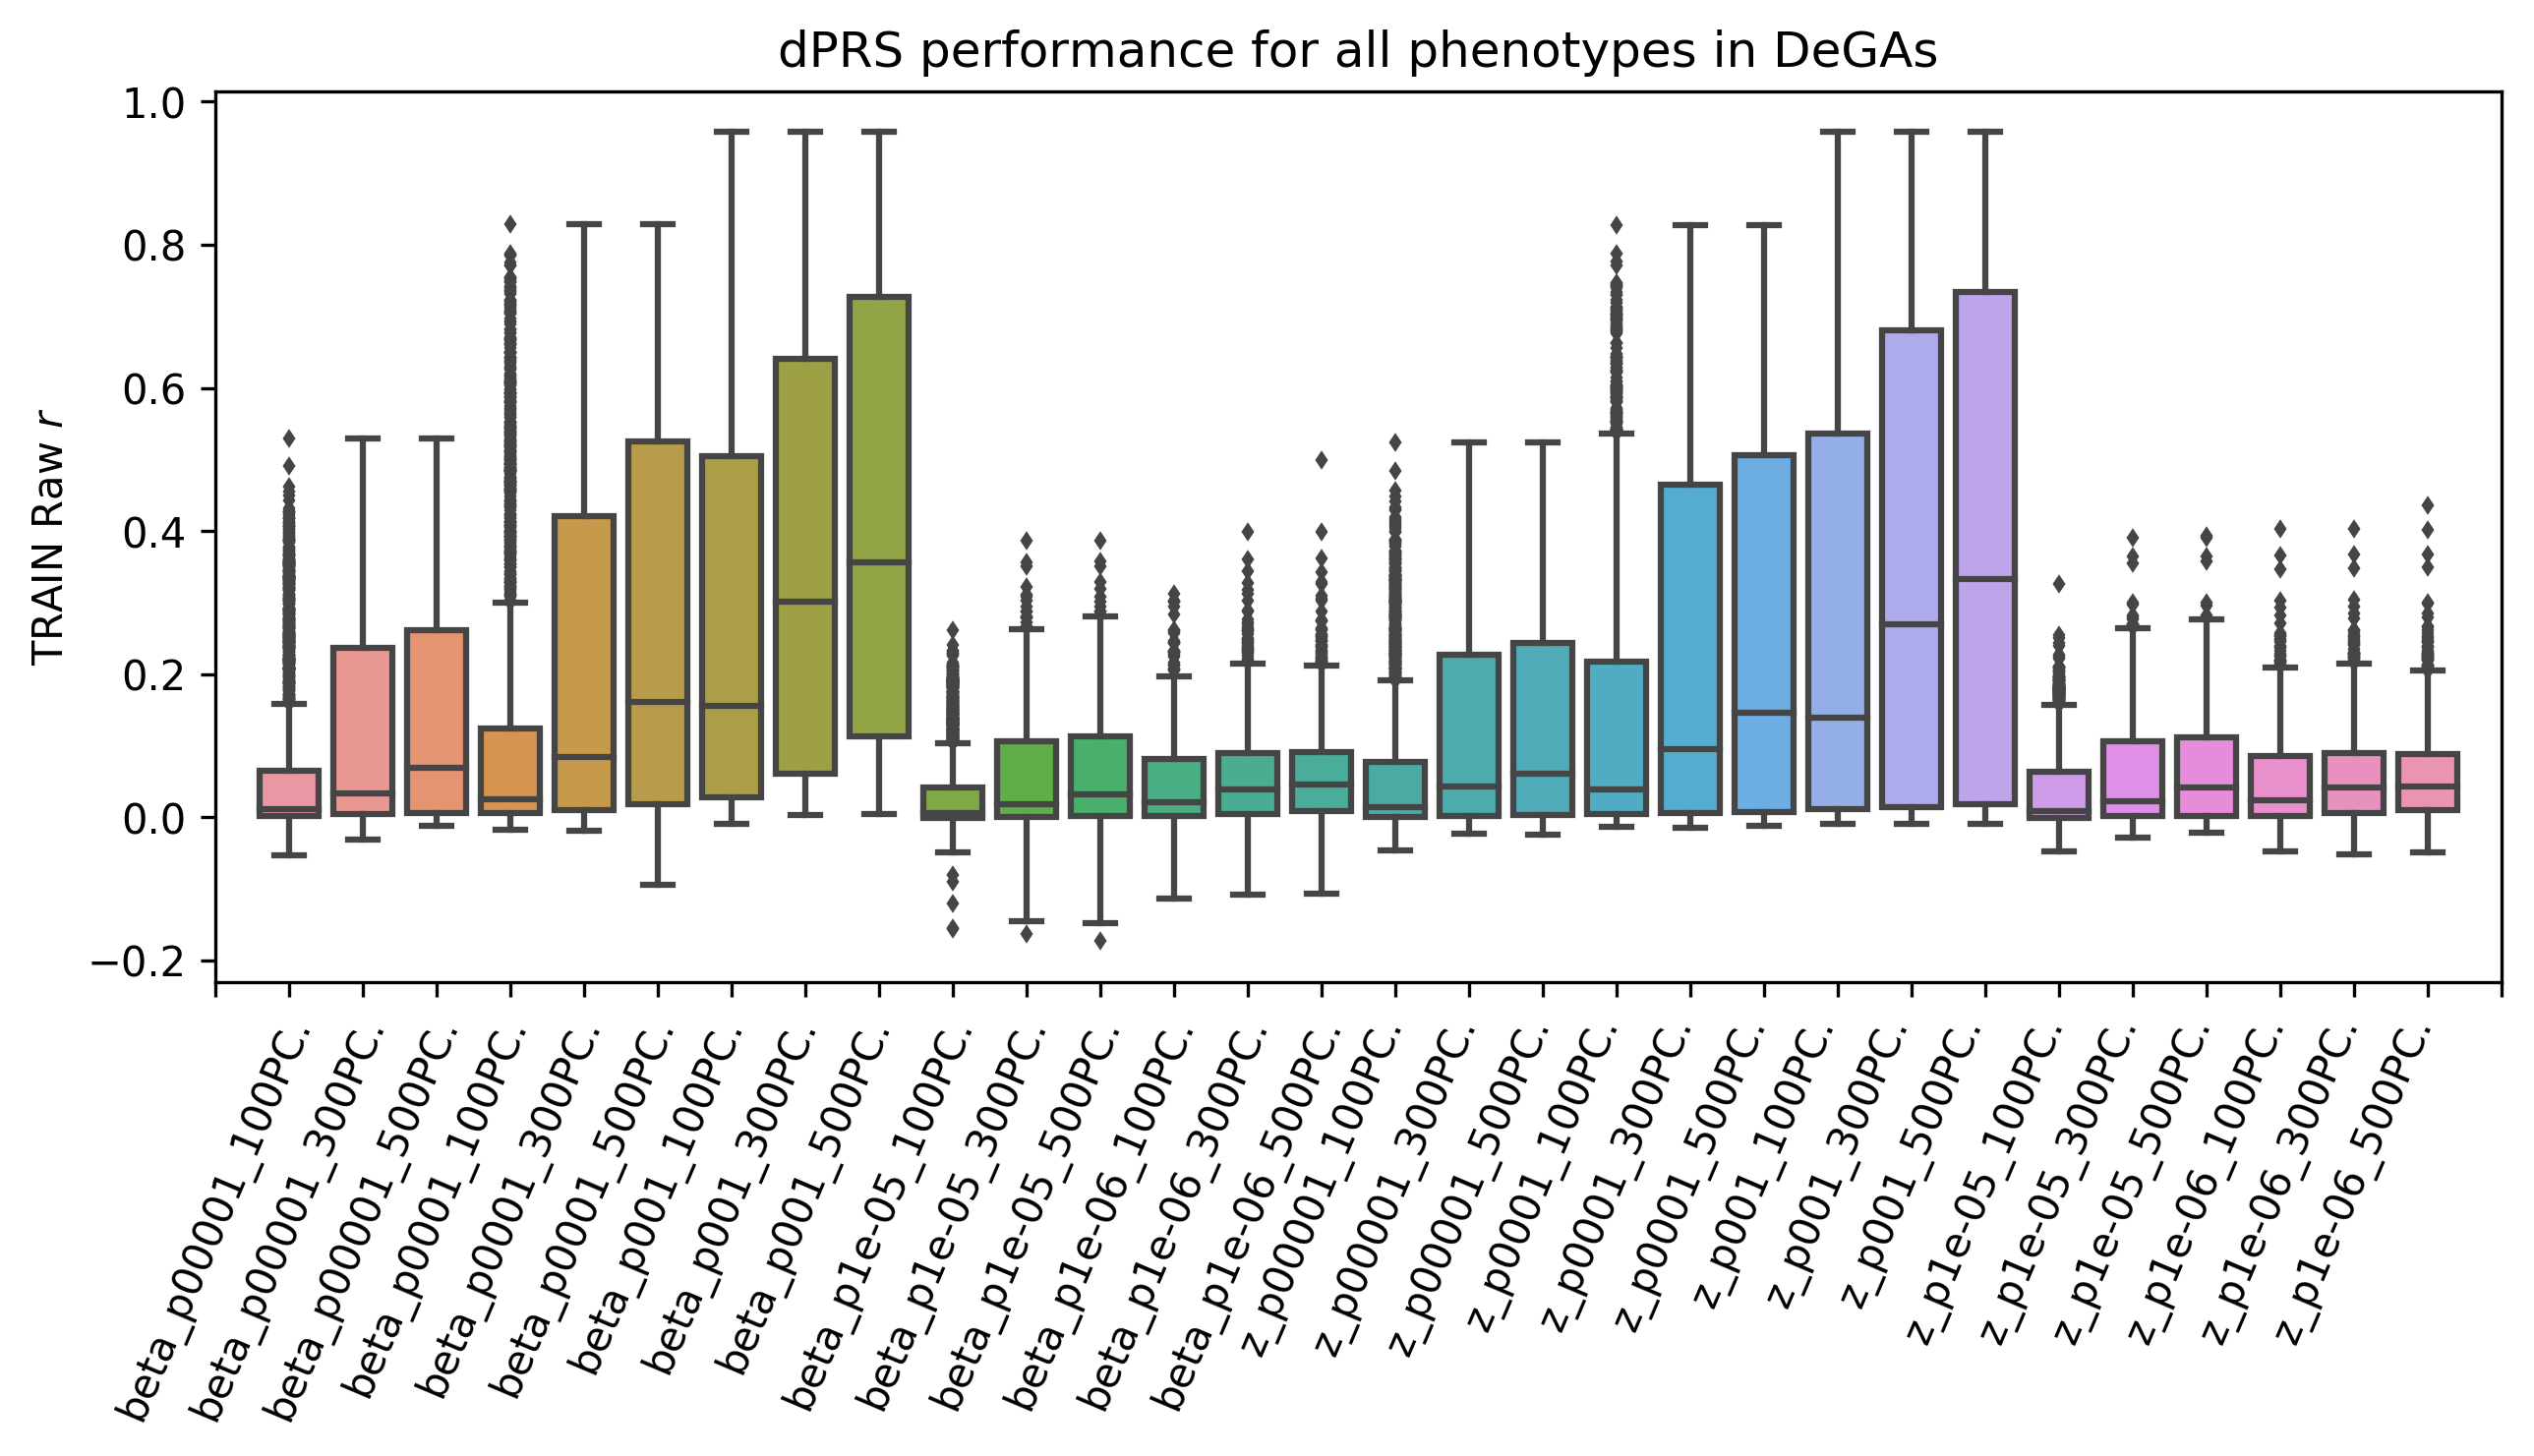

In [15]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=train.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
plt.xticks(list(range(-1,len(files)+1)), rotation=67), plt.xlabel('')
plt.ylabel(' '.join(['TRAIN',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [16]:
test=pd.DataFrame([datas[ds]['TEST_'+kind] for ds in datas], 
                 index=[ds for ds in datas]).T
test.head()

,beta_p0001_100PC.,z_p1e-06_300PC.,z_p1e-05_300PC.,beta_p001_100PC.,beta_p1e-06_300PC.,beta_p0001_500PC.,beta_p001_300PC.,z_p1e-05_500PC.,z_p001_500PC.,z_p00001_100PC.,...,z_p0001_300PC.,beta_p1e-05_300PC.,z_p0001_100PC.,beta_p1e-05_100PC.,beta_p00001_100PC.,beta_p00001_500PC.,z_p001_300PC.,z_p0001_500PC.,beta_p001_500PC.,z_p1e-05_100PC.
BIN10030500,0.014865,0.005483,-0.008465,0.016608,0.010421,0.023164,0.032636,-0.008347,0.020570,-0.006116,...,0.009863,0.009977,0.012359,-0.007926,0.006590,0.009952,0.014113,0.009374,0.033226,-0.010472
BIN10030510,0.015349,0.011165,0.007271,0.010938,0.019071,0.028238,0.027808,0.005213,0.014477,0.003276,...,0.007537,0.015476,0.015447,0.002027,0.004041,0.009957,0.012597,0.006026,0.027605,-0.012719
BIN10030800,-0.007426,0.004711,0.006434,0.004501,-0.005896,0.012968,0.001576,0.007702,0.011928,-0.001308,...,0.008056,0.010672,0.005843,0.007887,0.001111,0.012341,0.010064,0.016865,0.009901,-0.004074
BIN10030820,0.037786,0.035104,0.033848,0.037484,0.039136,0.043423,0.035819,0.034046,0.034251,0.033535,...,0.036939,0.039555,0.035768,0.034428,0.034771,0.043158,0.034196,0.036874,0.044172,0.033513
BIN1020483,0.005464,NaN,0.004902,0.012825,NaN,-0.002417,0.014517,0.004254,0.000575,-0.007330,...,0.000573,-0.000799,-0.003457,0.008508,0.000539,-0.007173,0.003948,0.000011,0.014995,-0.004348


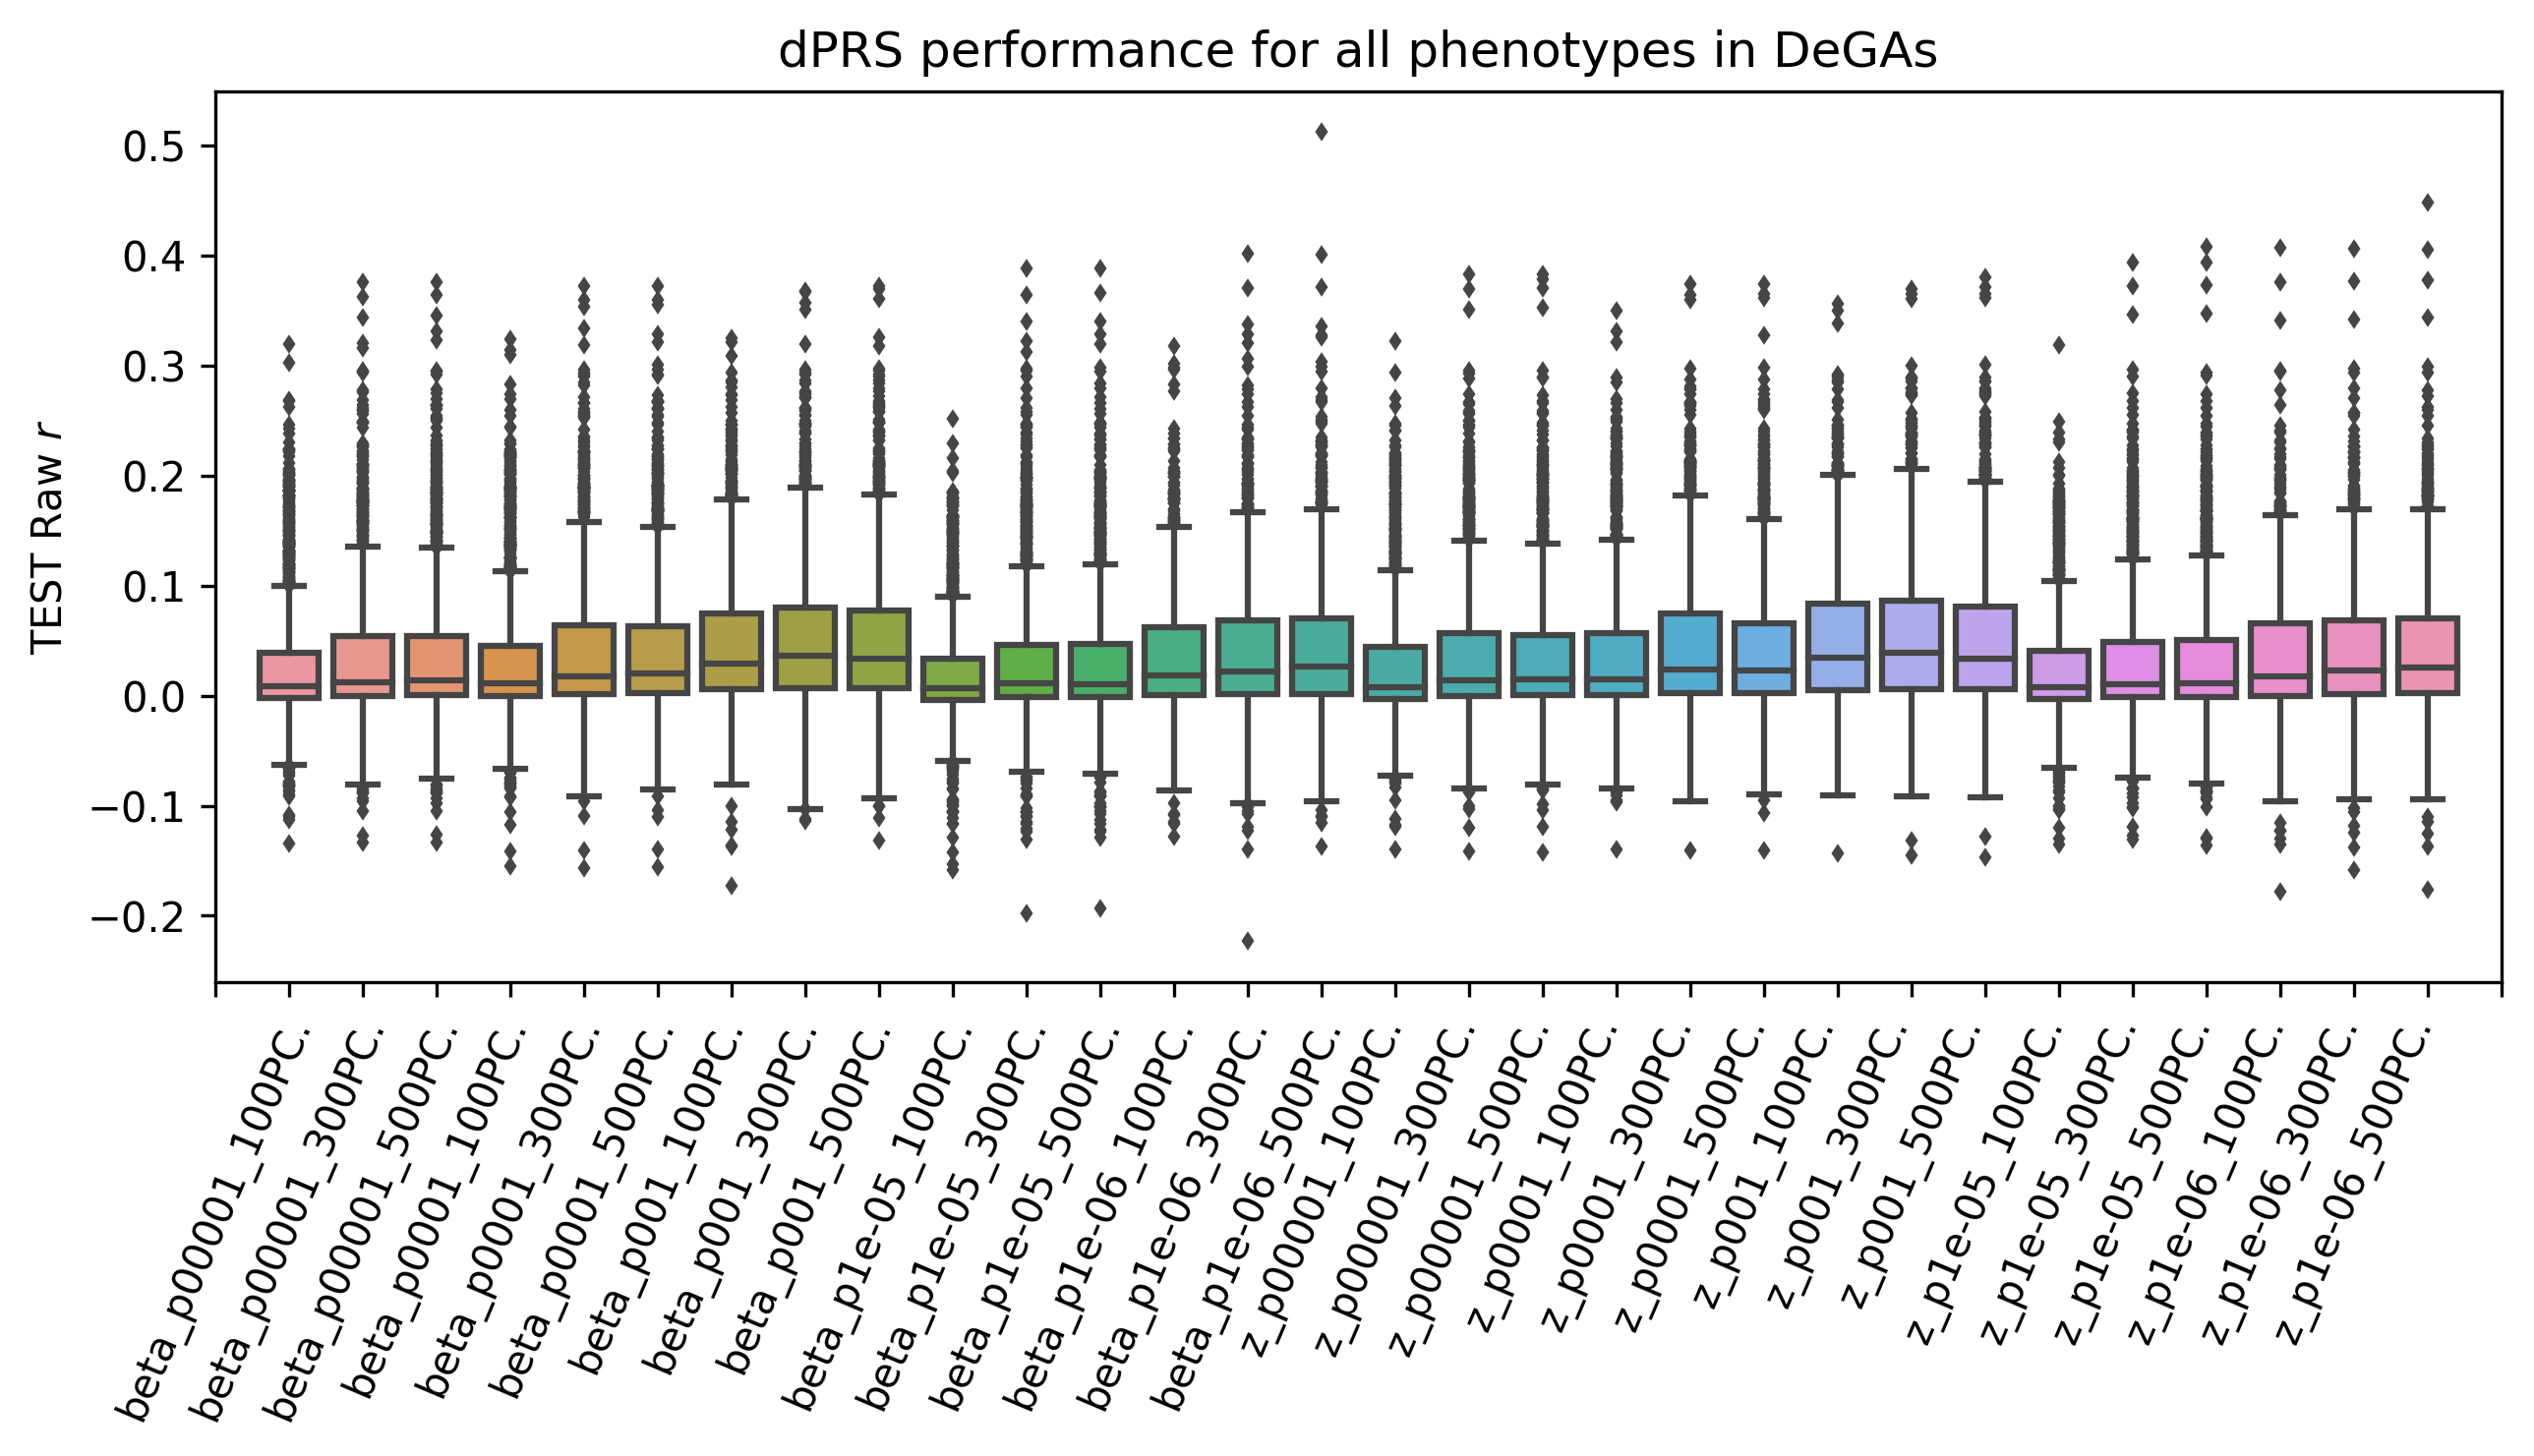

In [17]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=test.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
           #showfliers=0)
plt.xticks(list(range(-1,len(files)+1)), rotation=67), plt.xlabel('')
plt.ylabel(' '.join(['TEST',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [18]:
test.mean().sort_values()[::-1]

z_p001_300PC.         0.054072
z_p001_100PC.         0.052555
beta_p001_300PC.      0.051728
z_p001_500PC.         0.051601
beta_p001_500PC.      0.050188
beta_p001_100PC.      0.046909
z_p0001_300PC.        0.045567
beta_p1e-06_500PC.    0.045048
z_p1e-06_500PC.       0.044349
z_p0001_500PC.        0.043013
z_p1e-06_300PC.       0.042472
beta_p1e-06_300PC.    0.042122
beta_p0001_500PC.     0.040793
beta_p0001_300PC.     0.039961
z_p1e-06_100PC.       0.037457
z_p0001_100PC.        0.037180
z_p00001_300PC.       0.036505
beta_p1e-06_100PC.    0.036247
z_p00001_500PC.       0.036003
beta_p00001_300PC.    0.035282
beta_p00001_500PC.    0.035094
beta_p0001_100PC.     0.032358
z_p1e-05_500PC.       0.032032
z_p1e-05_300PC.       0.031274
beta_p1e-05_500PC.    0.031180
beta_p1e-05_300PC.    0.030564
z_p00001_100PC.       0.028623
beta_p00001_100PC.    0.027157
z_p1e-05_100PC.       0.024533
beta_p1e-05_100PC.    0.020086
dtype: float64

In [19]:
wilcoxon(test[test.mean().sort_values()[::-1].index[0]], 
         test[test.mean().sort_values()[::-1].index[1]])

WilcoxonResult(statistic=853643.0, pvalue=2.8987563060846863e-07)

In [20]:
datas['z_p001_300PC.'].sort_values('TRAIN_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI22401,0.957794,0.085422
INI22400,0.938237,0.084034
INI23278,0.932544,-0.079319
INI6183,0.923663,-0.081295
INI22410,0.921140,-0.060029


In [21]:
datas['z_p001_300PC.'].sort_values('TEST_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI30100,0.423130,0.369894
INI10030840,0.404506,0.365183
INI20030660,0.406486,0.360431
QT_FC1001717,0.334534,0.299742
INI20030760,0.384304,0.288944


In [22]:
pd.DataFrame([datas[d].loc['INI50',:] for d in datas], index=[d for d in datas]).sort_values('TEST_'+kind)[::-1]

,TRAIN_RAW,TEST_RAW
beta_p001_100PC.,0.323731,0.262646
beta_p001_300PC.,0.323205,0.261144
beta_p001_500PC.,0.322487,0.260526
z_p001_300PC.,0.301047,0.251870
z_p001_500PC.,0.300193,0.251153
beta_p0001_100PC.,0.278556,0.243829
z_p001_100PC.,0.286840,0.239647
beta_p0001_300PC.,0.270962,0.235600
beta_p0001_500PC.,0.270159,0.234883
z_p0001_300PC.,0.255865,0.226796


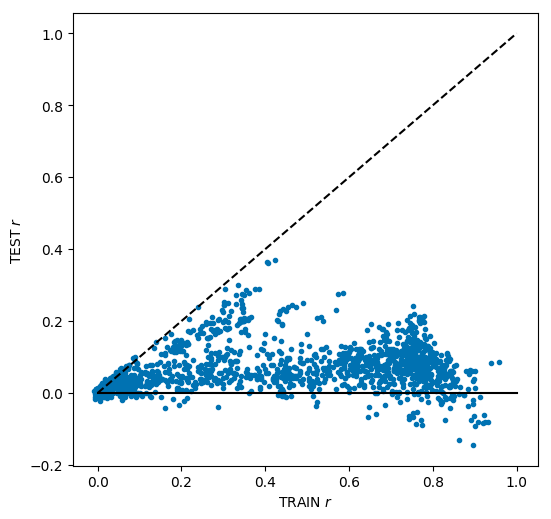

In [24]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas['z_p001_300PC.']['TRAIN_'+kind], 
         datas['z_p001_300PC.']['TEST_'+kind], '.')
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('TRAIN '+'$r$'), plt.ylabel('TEST '+'$r$')
plt.show()

In [ ]:
npzs = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/train/tsvd/*20190805*.npz')
print('\n'.join(map(os.path.basename,npzs)))

In [ ]:
for npz in npzs:
    continue
    z=np.load(npz)
    plt.figure(figsize=(12,4), dpi=300)
    plt.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
    plt.xticks(np.arange(0,z['D'].shape[0],20))
    plt.xlabel('PC'),plt.ylabel('Variance explained')
    # plt.plot([0,z['D'].shape[0]],[1.0/z['V'].shape[0],1.0/z['V'].shape[0]], 'k--')
    plt.legend([os.path.splitext(os.path.basename(npz))[0][4:-16]]) #, 'Isotropic variance'])
    plt.show()